In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgbimage, option = 0):
    '''
        option 0
            Y = (Red + Green + Blue)/3
        option 1
            Y = Red * 0.2126 + Geeen * 0.7152 + Blue * 0.0722
        option 2
            Y = Red * 0.299 + Green * 0.587  + Blue * 0.114
    '''
    row, col, _= rgbimage.shape
    grayimage = np.zeros((row, col))
    option0 = [1/3, 1/3, 1/3]
    option1 = [0.2126, 0.7152, 0.0722]
    option2 = [0.299, 0.587, 0.144]
    weight = [option0, option1, option2]
    
    for i in range(row):
        for j in range(col):
            grayimage[i][j] = weight[option][0]*rgbimage[i][j][0] + weight[option][1]*rgbimage[i][j][1] + weight[option][2]*rgbimage[i][j][2]
            grayimage[i][j]*=255
            
    return grayimage

def get_mask(mask_type='prewitX'):
    '''
    Arg:
        mask_type - string
            prewitX
            prewitY
            embos1
            embos2
            laplace4
            laplace8
            unsharp4
            unsharp8        
    return :
        mask
            numpy 3 by 3 matrix
    '''
    if mask_type == 'prewitX':
        mask = [1, 1, 1, 0, 0, 0, -1, -1, -1]
    if mask_type == 'prewitY':
        mask = [1, 0, -1, 1, 0, -1, 1, 0, -1]
    if mask_type == 'embos1':
        mask = [1, 0, 0, 0, 0, 0, 0, 0, -1]
    if mask_type == 'embos2':
        mask = [0, 0, 1, 0, 0, 0, -1, 0, 0]
    if mask_type == 'laplace4':
        mask = [0, 1, 0, 1, -4, 1, 0, 1, 0]
    if mask_type == 'laplace8':
        mask = [1, 1, 1, 1, -8, 1, 1, 1, 1]
    if mask_type == 'unsharp4':
        mask = [0, -1, 0, -1, 5, -1, 0, -1, 0]
    if mask_type == 'unsharp8':
        mask = [-1, -1, -1, -1, 8, -1, -1, -1, -1]         
    mask = np.reshape(np.array(mask), [3, 3])
    return mask

def clip(x, vmax = 255, vmin = 0):
    '''
        Clip the value of x between vmax, and vmin
    '''
    if x>vmax:
        return vmax
    if x<vmin:
        return vmin
    return x

def conv(image, filt):
    '''
        image : 2D np array
        filt : 2D np array
    '''
    ir, ic = image.shape
    fr, fc = filt.shape
    
    conv_image = np.zeros((ir, ic))
    for r in range(ir):
        for c in range(ic):
            value = 0
            for i in range(fr):
                for j in range(fc):
                    if r+i>=0 and r+i<ir and c+j>=0 and c+j<ic :
                        value += filt[i][j]*image[r+i][c+j]
            conv_image[r][c] = clip(value)
    return conv_image


def flatten_image(image):
    row, col = image.shape
    image_size = row*col
    hist = np.zeros(256, dtype = int)
    cum_hist = np.zeros(256, dtype = int)
    norm_cum_hist = np.zeros(256)
    flat_image = np.zeros((row,col))
    hist2 = np.zeros(256)

    for i in range(row):
        for j in range(col):
            hist[int(image[i][j])]+=1

    cum_hist[0] = hist[0]
    for i in range(1, 256):
        cum_hist[i]=cum_hist[i-1]+hist[i]
    for i in range(256):
        norm_cum_hist[i] = float(cum_hist[i])/image_size

    for i in range(row):
        for j in range(col):
            flat_image[i][j] = norm_cum_hist[int(image[i][j])]*255
            hist2[int(flat_image[i][j])]+=1
    return flat_image

In [3]:
image = plt.imread('./image.png')
gray_image = rgb2gray(image, option = 0)

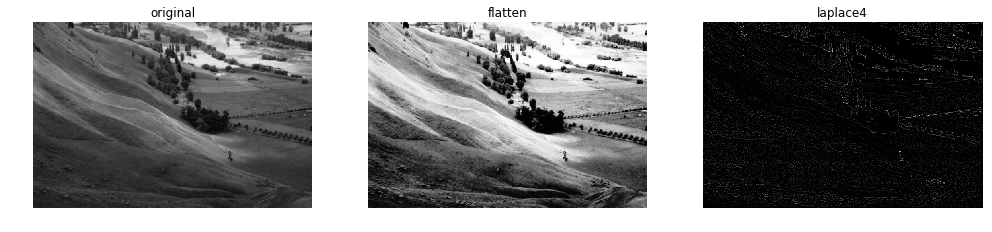

In [7]:
mask_type = 'laplace4'
flat_image = flatten_image(gray_image)
mask = get_mask(mask_type)
conv_image = conv(flat_image, mask)
fig = plt.figure(figsize=(17,17))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.imshow(gray_image, cmap = 'gray')
ax1.set_title('original')
ax1.set_axis_off()
ax2.imshow(flat_image, cmap = 'gray')
ax2.set_title('flatten')
ax2.set_axis_off()
ax3.imshow(conv_image, cmap = 'gray')
ax3.set_title(mask_type)
ax3.set_axis_off()
plt.show()